# 100跳和按照10跳划分子域的结果。

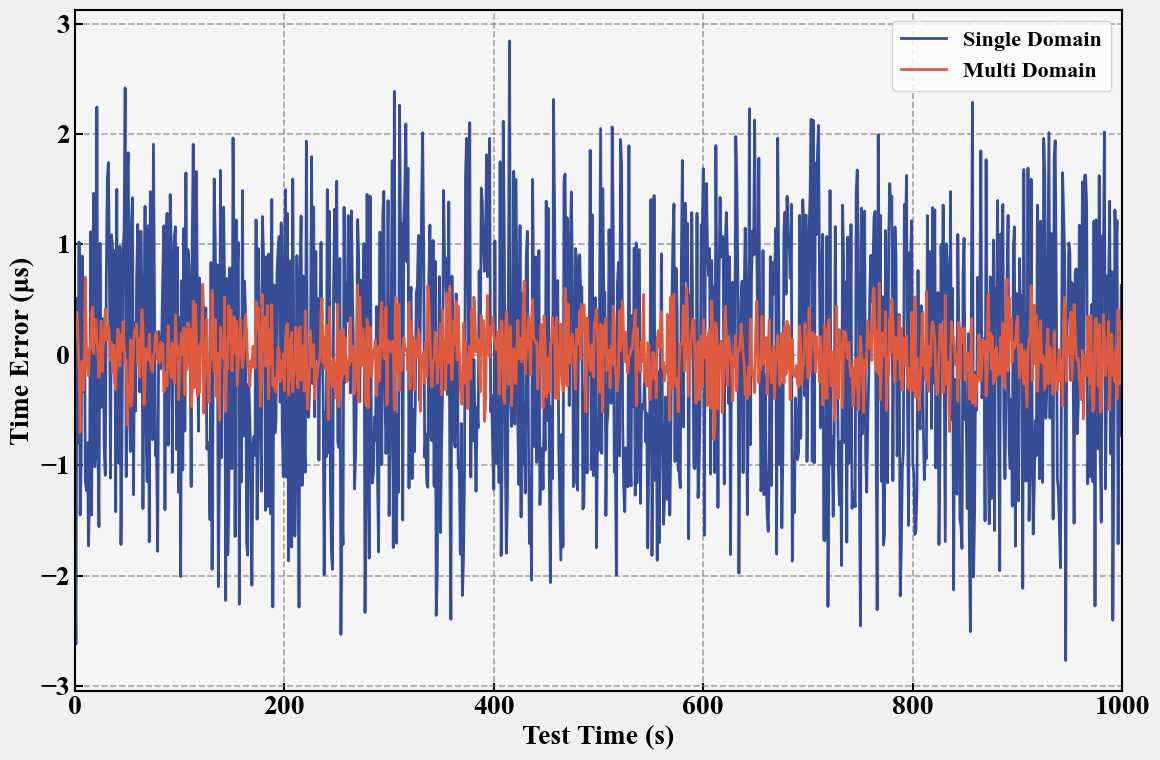

图像已成功生成并保存在output_image文件夹中。


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.font_manager import FontProperties

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'bold'

# 设置颜色
colors = ['#354e97', '#df5b3f', '#f5b46f']

# 创建输出目录（如果不存在）
output_dir = 'output_image'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 1. 读取第一个CSV文件的数据
file_path1 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\single_domain_data_v2.csv"
df1 = pd.read_csv(file_path1)

# 获取第100列(索引为99)的数据，注意跳过标题行
col_name1 = df1.columns[99]  # 获取列名
data1 = df1[col_name1].values  # 获取该列所有数据

# 将数据从秒转换为微秒
data1_us = data1 * 1e6  # 秒转换为微秒

# 2. 读取第二个CSV文件的数据
file_path2 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_v2.csv"
df2 = pd.read_csv(file_path2)

# 获取第100列的数据
col_name2 = df2.columns[99]  # 获取列名
data2 = df2[col_name2].values  # 获取该列所有数据

# 将数据从秒转换为微秒
data2_us = data2 * 1e6  # 秒转换为微秒

# 3. 创建x轴数据（从0开始）
x1 = np.arange(len(data1_us))
x2 = np.arange(len(data2_us))

# 4. 绘制折线图
fig, ax = plt.subplots(figsize=(12, 8))

# 设置图表背景色为浅灰色
fig.patch.set_facecolor('#f0f0f0')  # 设置图形背景
ax.set_facecolor('#f5f5f5')  # 设置坐标轴背景

# 绘制第一组数据
ax.plot(x1, data1_us, color=colors[0], linewidth=2, label='100 Hops Time-')

# 绘制第二组数据
ax.plot(x2, data2_us, color=colors[1], linewidth=2, label='Multi Domain')

# 设置坐标轴颜色和宽度，确保它们可见
ax.spines['bottom'].set_color('black')  # x轴颜色
ax.spines['left'].set_color('black')    # y轴颜色
ax.spines['bottom'].set_linewidth(1.5)  # x轴线宽
ax.spines['left'].set_linewidth(1.5)    # y轴线宽

# 确保右侧和顶部边框也可见
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

# 设置刻度向内
ax.tick_params(direction='in', width=1.5, length=6, colors='black')

# 设置x轴从0开始
ax.set_xlim(left=0,right=1000)  # 确保x轴从0开始

# 设置网格线，使用深色并增加线宽以确保可见性
ax.grid(True, linestyle='--', linewidth=1.2, color='gray', alpha=0.7, zorder=0)

# 设置图表标题和标签
ax.set_xlabel('Test Time (s)', fontweight='bold')
ax.set_ylabel('Time Error (μs)', fontweight='bold')

# 添加图例
ax.legend(fontsize=16)

# 调整布局
plt.tight_layout()

# 5. 保存图片（600 DPI）
plt.savefig(os.path.join(output_dir, 'time_error_comparison.png'), dpi=600, bbox_inches='tight')

# 6. 显示图片
plt.show()

print("图像已成功生成并保存在output_image文件夹中。")

# 设置背景全透明

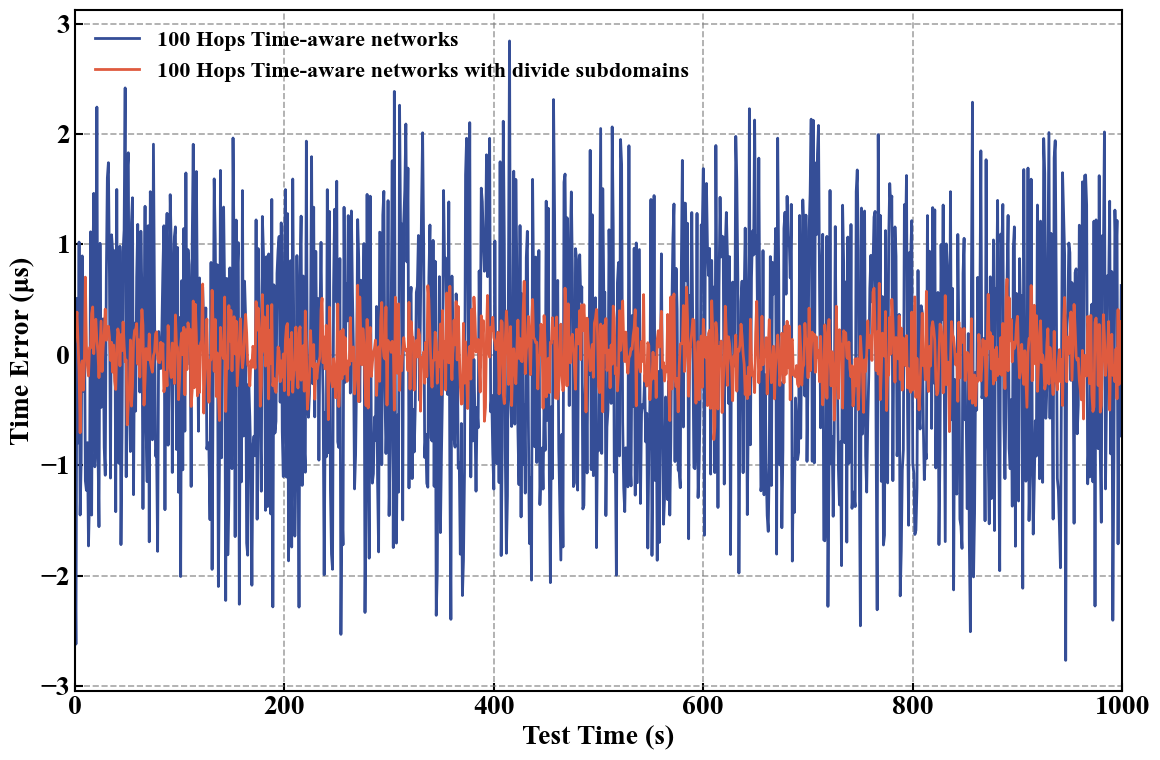

图像已成功生成并保存在output_image文件夹中。


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.font_manager import FontProperties

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'bold'

# 设置颜色
colors = ['#354e97', '#df5b3f', '#f5b46f']

# 创建输出目录（如果不存在）
output_dir = 'output_image'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 1. 读取第一个CSV文件的数据
file_path1 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\single_domain_data_v2.csv"
df1 = pd.read_csv(file_path1)

# 获取第100列(索引为99)的数据，注意跳过标题行
col_name1 = df1.columns[99]  # 获取列名
data1 = df1[col_name1].values  # 获取该列所有数据

# 将数据从秒转换为微秒
data1_us = data1 * 1e6  # 秒转换为微秒

# 2. 读取第二个CSV文件的数据
file_path2 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_v2.csv"
df2 = pd.read_csv(file_path2)

# 获取第100列的数据
col_name2 = df2.columns[99]  # 获取列名
data2 = df2[col_name2].values  # 获取该列所有数据

# 将数据从秒转换为微秒
data2_us = data2 * 1e6  # 秒转换为微秒

# 3. 创建x轴数据（从0开始）
x1 = np.arange(len(data1_us))
x2 = np.arange(len(data2_us))

# 4. 绘制折线图 - 使用透明背景
fig, ax = plt.subplots(figsize=(12, 8))

# 设置透明背景
fig.patch.set_alpha(0)  # 图形整体背景透明
ax.patch.set_alpha(0)   # 坐标轴区域背景透明

# 绘制第一组数据
ax.plot(x1, data1_us, color=colors[0], linewidth=2, label='100 Hops Time-aware networks')

# 绘制第二组数据
ax.plot(x2, data2_us, color=colors[1], linewidth=2, label='100 Hops Time-aware networks with divide subdomains')

# 设置坐标轴颜色和宽度，确保它们可见
ax.spines['bottom'].set_color('black')  # x轴颜色
ax.spines['left'].set_color('black')    # y轴颜色
ax.spines['bottom'].set_linewidth(1.5)  # x轴线宽
ax.spines['left'].set_linewidth(1.5)    # y轴线宽

# 确保右侧和顶部边框也可见
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

# 设置刻度向内
ax.tick_params(direction='in', width=1.5, length=6, colors='black')

# 设置x轴从0开始
ax.set_xlim(left=0,right=1000)  # 确保x轴从0开始

# 设置网格线，使用深色并增加线宽以确保可见性
ax.grid(True, linestyle='--', linewidth=1.2, color='gray', alpha=0.7, zorder=0)

# 设置图表标题和标签
ax.set_xlabel('Test Time (s)', fontweight='bold')
ax.set_ylabel('Time Error (μs)', fontweight='bold')

# 添加图例，设置透明背景
legend = ax.legend(fontsize=16, loc='upper left')  # 或者其他左侧位置
legend.get_frame().set_alpha(0)  # 图例背景透明

# 调整布局
plt.tight_layout()

# 5. 保存图片（600 DPI），设置透明背景
plt.savefig(os.path.join(output_dir, 'time_error_comparison_v2.png'), 
            dpi=600, 
            bbox_inches='tight',
            transparent=True)  # 关键参数：透明=True

# 6. 显示图片
plt.show()

print("图像已成功生成并保存在output_image文件夹中。")

Generating data for single domain approach...
Simulating single domain hop 1...
Simulating single domain hop 2...
Simulating single domain hop 3...
Simulating single domain hop 4...
Simulating single domain hop 5...
Simulating single domain hop 6...
Simulating single domain hop 7...
Simulating single domain hop 8...
Simulating single domain hop 9...
Simulating single domain hop 10...
Simulating single domain hop 11...
Simulating single domain hop 12...
Simulating single domain hop 13...
Simulating single domain hop 14...
Simulating single domain hop 15...
Simulating single domain hop 16...
Simulating single domain hop 17...
Simulating single domain hop 18...
Simulating single domain hop 19...
Simulating single domain hop 20...
Simulating single domain hop 21...
Simulating single domain hop 22...
Simulating single domain hop 23...
Simulating single domain hop 24...
Simulating single domain hop 25...
Simulating single domain hop 26...
Simulating single domain hop 27...
Simulating single 